<a href="https://colab.research.google.com/github/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-19/blob/main/SVM_Equipo19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
### **Actividad 9. Práctica | Máquina de vector de soporte**


**Nombres y matrículas de los integrantes del equipo:**

* Aurelio Antonio Lozano Rabago A01081266
* Josias Ruiz Peña A00968460
* David González A01794025
* Jerson David Pérez Contreras A01793810
* Jose Alberto Mtanous Treviño A00169781

**Ruta Git:**

https://github.com/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-19/blob/main/SVM_Equipo19.ipynb

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [2]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, precision_recall_fscore_support, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_validate,  RepeatedKFold, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import RocCurveDisplay   


In [3]:
from matplotlib.pyplot import axis


path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'

df = pd.read_csv(path, sep="\s+")
df.columns = ['A1', 'A2',  'A3',  'A4',  'A5',  'A6',  'A7',  'A8',  'A9',  'A10',  'A11',  'A12',  'A13',  'A14',  'A15']
categoricalColumns = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
numericalColumns = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']
tagColumn = 'A15'


#### Ejercicio-1
Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y
validación. Usa un random_state=0.

In [4]:
X = df.drop(tagColumn,axis=1)
y = df[tagColumn]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=0)

#### Ejercicio-2
Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas.
Utiliza un Pipeline para evitar el filtrado de información. 

En la descripción de los datos se explica que los datos ya fueron sanitizados y los valores faltantes remplazados por la moda para los valores categóricos o por el promedio para los valores numéricos. Así que en teoría no tenemos que limpiar los datos, de cualquier forma lo vamos a corroborar inspeccionándolos.
Fuente: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.doc

In [5]:
print('Estadística descriptiva de los datos')
print(df.describe())
print('-------------------------------------')

Estadística descriptiva de los datos
               A1          A2          A3          A4          A5          A6  \
count  689.000000  689.000000  689.000000  689.000000  689.000000  689.000000   
mean     0.677794   31.581974    4.748999    1.766328    7.377358    4.693759   
std      0.467661   11.856359    4.975215    0.430283    3.683694    1.993588   
min      0.000000   13.750000    0.000000    1.000000    1.000000    1.000000   
25%      0.000000   22.670000    1.000000    2.000000    4.000000    4.000000   
50%      1.000000   28.670000    2.750000    2.000000    8.000000    4.000000   
75%      1.000000   37.750000    7.080000    2.000000   10.000000    5.000000   
max      1.000000   80.250000   28.000000    3.000000   14.000000    9.000000   

               A7          A8          A9         A10         A11         A12  \
count  689.000000  689.000000  689.000000  689.000000  689.000000  689.000000   
mean     2.224332    0.523948    0.428157    2.403483    0.457184    1.

In [6]:
print('Faltan valores en nuestro juego de dato?')
print(df.isnull().values.any())
print('-------------------------------------')
print('Existen valores no númericos en nuestro juedo de datos?')
print(df.isna().values.any())

Faltan valores en nuestro juego de dato?
False
-------------------------------------
Existen valores no númericos en nuestro juedo de datos?
False


In [7]:
# Para las variables categóricas vamos a crear onehot encodings
pipelineCategoricas = Pipeline(steps = [('oneHotEncoding', OneHotEncoder(handle_unknown="ignore",drop='first'))])

# Para las variable numéricas vamos a usar z score
pipelineNumericas = Pipeline(steps = [('zScore', StandardScaler())])


In [8]:
transformer = ColumnTransformer(transformers=[('Numericas', pipelineNumericas, numericalColumns), 
                                            ('Categoricas', pipelineCategoricas, categoricalColumns)],
                                            remainder='passthrough')

#### Ejercicio-3
Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto 
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las 
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar 
la estrategia “stratified” en este caso? 

In [9]:
dummyC = DummyClassifier(strategy='stratified', random_state=0)
dummyC.fit(transformer.fit_transform(X_train),y_train)
yHatDummyC = dummyC.predict(transformer.fit_transform(X_test))

print('--------------recall_score---------------')
print(recall_score(y_test, yHatDummyC))
print('--------------accuracy_score---------------')
print(accuracy_score(y_test, yHatDummyC))
print('--------------precision_score---------------')
print(precision_score(y_test, yHatDummyC))
print('--------------f1_score---------------')
print(f1_score(y_test, yHatDummyC))
print('----------------------------------')

--------------recall_score---------------
0.5
--------------accuracy_score---------------
0.5288461538461539
--------------precision_score---------------
0.40816326530612246
--------------f1_score---------------
0.449438202247191
----------------------------------


El método Stratified es una técnica que permite la creación de subgrupos homogéneos de clases, garantizando que en cada uno de los subgrupos (estratos) se encuentren representadas las características de toda la población.

#### Ejercicio-4
Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros 
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio 
anterior. 

In [10]:
Xt = transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=.15, random_state=0)

kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=7)  


ParamsSVC = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'C':[100, 10, 1, 0.5, 0.1, .01],
             'gamma':[0.05, 0.1, 1, 10, 30, 50]
             }

ParamScoring = {"Recall": make_scorer(recall_score), 
                "Accuracy": make_scorer(accuracy_score), 
                "Precision": make_scorer(precision_score), 
                "F1": make_scorer(f1_score)}


In [11]:
best_scores = {}
for name, Scorer in ParamScoring.items():
    GridSVC = GridSearchCV( SVC(),
                            param_grid = ParamsSVC,
                            scoring= Scorer,
                            n_jobs=-1,
                            cv=kf
                            )
    GridSVC.fit(X_train, y_train)
    best_scores[name] = {}
    best_scores[name]["best_score"] = GridSVC.best_score_
    best_scores[name]["best_params"] = GridSVC.best_params_

print(best_scores)

{'Recall': {'best_score': 0.9250034940600977, 'best_params': {'C': 0.5, 'gamma': 0.05, 'kernel': 'linear'}}, 'Accuracy': {'best_score': 0.8516239316239316, 'best_params': {'C': 0.5, 'gamma': 0.1, 'kernel': 'poly'}}, 'Precision': {'best_score': 0.9573333333333334, 'best_params': {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}}, 'F1': {'best_score': 0.8488671576426071, 'best_params': {'C': 0.1, 'gamma': 0.05, 'kernel': 'linear'}}}


La métrica F1 Score es la más balanceada porque combina la precisión y el recall. Por lo tanto la mejor combinación de parámetros de nuestro modelo son:
* C = 0.1 
* gamma = 0.05 
* kernel = 'linear'

#### Ejercicio-5
Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. 
Incluye tus conclusiones. 

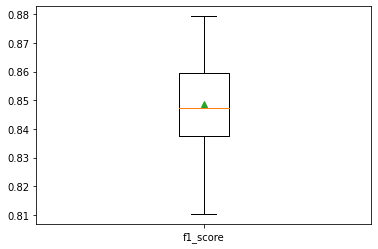

In [12]:
bestModel = SVC(kernel='linear', C=0.1, gamma=0.05, probability=True)
resultado = cross_validate(bestModel, X_train, y_train, scoring=make_scorer(f1_score), cv=kf, return_train_score=True)

plt.boxplot(resultado['test_score'], labels=['f1_score'], showmeans=True)
plt.show()

Dado que el F1 - Score permitió obtener los mejores resultados de la combinación de las metricas de recall y precision, nos permite reflejar la relación entre la proporción total de los verdaderos positivos respecto al total de los datos positivos. Como se observa en el gráfico, la media del F1 - Score se ubica en el 85%, generando un muy buen desempeño del modelo en cuanto a su predicción para verdaderos positivos.

#### Ejercicio-6
Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de 
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, 
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno 
de estos problemas.

In [13]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('F1 score')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

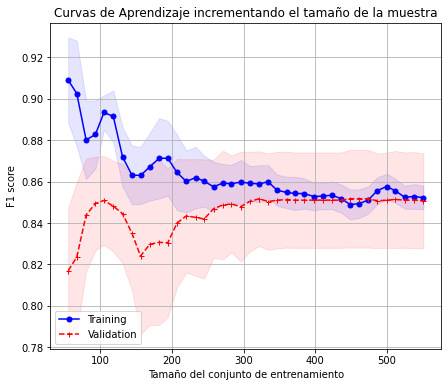

In [14]:
delta_train_sz = np.linspace(0.1,1.0,num=40)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = bestModel ,    
                                                        X = Xt,
                                                        y = y,
                                                        cv = kf,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11,
                                                        scoring=make_scorer(f1_score)
                                                        )

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Consideramos que el modelo tiene un buen desempeño, no está ni sobreentrenado ni subentrenado, haciendo la claridad que llega un punto luego de los 300 datos en los que ya no puede mejorar, se observa la estabilización en 85% F1 scoring.

#### Ejercicio-7
Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la
curva. 

TP_rate-recall:0.92500
FP_rate:0.14062


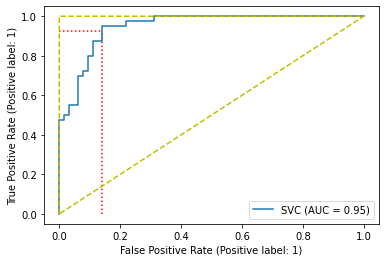

In [15]:
bestModel.fit(X_train,y_train)
yHatBestModel = bestModel.predict(X_test)
cm = confusion_matrix(y_test, yHatBestModel)    # los renglones son los reales y las columnas las predicciones.

TPrate = cm[1,1]/(cm[1,0]+cm[1,1])
FPrate = cm[0,1]/(cm[0,0]+cm[0,1])

print('TP_rate-recall:%.5f' % TPrate)
print('FP_rate:%.5f' % FPrate)

RocCurveDisplay.from_estimator(bestModel, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')

plt.hlines(TPrate, 0, FPrate, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(FPrate, 0, TPrate, colors='r', linestyles='dotted')  # Pero el mejor umbral para que ambos errores estén lo más equilibrados
plt.show()                         

El área bajo la curva (AUC): 0.95

#### Ejercicio-8
Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica
f1-score. 

In [16]:
def adjustedThYhat(th, modelo, x, y):
  p = modelo.predict_proba(x)
  oneProbs = p[:,1]
  for i, oneProb in enumerate(oneProbs):
    if oneProb > th:
      oneProbs[i] = 1
    else:
      oneProbs[i] = 0
  return oneProbs

In [17]:
x0 = np.arange (0.0,0.85,0.0001)

f1_old = [x0[0],0]
for x in x0:
  yHatAdjusted = adjustedThYhat(x,bestModel,X_test,y_test)
  f1_new=[x,f1_score(y_test,yHatAdjusted)]
  if f1_new[1] > f1_old[1]:
    f1_old = f1_new
print(f1_old)

[0.0767, 0.8735632183908046]


El valor máximo del parámetro F1 Score se obtuvo con un umbral de 0.0767 resultando en 0.8735 [F1-Score].

#### Ejercicio-9
Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g-
mean.

In [18]:
from imblearn.metrics import geometric_mean_score

x0 = np.arange (0,0.85,0.0001)

gmean_old = [x0[0],0]
x_best = 0
for x in x0:
  yHatAdjusted = adjustedThYhat(x,bestModel,X_test,y_test)
  gmean_new=[x,geometric_mean_score(y_test,yHatAdjusted)]
  if gmean_new[1] > gmean_old[1]:
    gmean_old = gmean_new
    x_best= x
print(gmean_old)
print(x_best)

[0.0767, 0.9035520184250599]
0.0767


El valor máximo del parámetro gmean se obtuvo con un umbral de 0.0767 resultando en 0.9036 [gmean].

#### Ejercicio-10
Incluye tus conclusiones finales de la actividad.

Dentro de los resultados que se obtuvieron a lo largo del estudio, se ecnontró que el modelo con el mejor puntaje fue el F1 - Score. Al momento de realizar el gráfico de bigotes se observó que el conjunto de datos en ese modelo se comportan de forma muy similar a una distribución normal y la media de los datos estaba ubicado en el centro de los datos.

Por otro lado, con este modelo se realizaron los cálculos para la curva ROC y determinar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score, el cual se obtuvo con un valor cercano al 0.93 el cual está muy cercano a 1 el cual es el valor óptiimo.

Por otro lado, el valor del mejor umbral de predicción del modelo que maximiza el valor de la métrica g - mean fue 0.0787 la cual maximiza el acierto en ambas clases con un balance igua para ambas con un resultado de 90.36 en su desempeño.